In [1]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import datasets,layers,models
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


2.13.0


In [3]:
import os

# Update the imgag variable with the correct path
imgag = r"C:\Users\prath\Downloads\Brain\BDT\BTDS"

# Check if the specified path exists
if os.path.exists(imgag):
    print("The specified path exists.")
else:
    print("The specified path does not exist.")

# Print information about each subfolder and its images
for expression in os.listdir(imgag):
    if not expression.startswith('.'):  # Filter out hidden files (optional)
        num_images = len(os.listdir(os.path.join(imgag, expression)))
        print(expression, "folder contains\t\t", num_images, 'images')


The specified path exists.
Brain Tumor folder contains		 2513 images
Healthy folder contains		 2087 images


In [ ]:
BATCH_SIZE = 64
IMAGE_SIZE = 150
input_shape = (150,150,3)

In [ ]:
Data_gen = ImageDataGenerator(rescale = 1.0/255,validation_split = 0.2)

In [ ]:
train_set = Data_gen.flow_from_directory(imgag,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "rgb",
                                        shuffle=True,
                                        class_mode = "binary",
                                        subset = "training")

In [17]:
test_set = Data_gen.flow_from_directory(imgag,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "rgb",
                                        shuffle=False,
                                        class_mode = "binary",
                                        subset = "validation")

Found 919 images belonging to 2 classes.


In [18]:
train_labels = train_set.classes
test_labels = test_set.classes


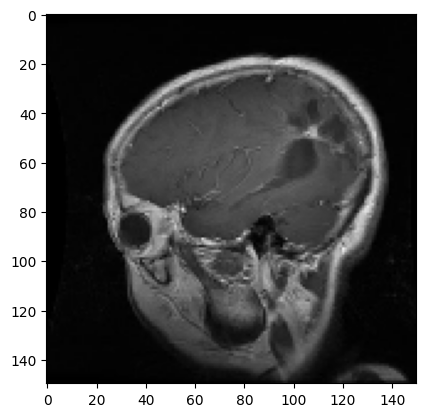

In [10]:
batch = next(train_set)

plt.imshow(batch[0][0])

In [19]:
from keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
incep_model = Sequential()
model = InceptionV3(weights='imagenet',
                    include_top = False,
                    input_shape = (150,150,3))
for layer in model.layers:
    layer.trainable=False
incep_model.add(model)
incep_model.add(Flatten())
incep_model.add(Dense(512,activation='relu'))

incep_model.add(Dense(256,activation='relu'))

incep_model.add(Dense(128,activation='relu'))

incep_model.add(Dense(1,activation='sigmoid'))
incep_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               9437696   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 31404833 (119.80 MB)
Trainable params: 9

In [20]:
optimizer = tf.keras.optimizers.Adam()
incep_model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
epochs = 10
history = incep_model.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)

Epoch 1/10
58/58 [==============================] - 58s 951ms/step - loss: 1.3663 - accuracy: 0.7838 - val_loss: 0.3102 - val_accuracy: 0.8738
Epoch 2/10
58/58 [==============================] - 72s 1s/step - loss: 0.1910 - accuracy: 0.9280 - val_loss: 0.1431 - val_accuracy: 0.9467
Epoch 3/10
58/58 [==============================] - 71s 1s/step - loss: 0.1638 - accuracy: 0.9381 - val_loss: 0.2172 - val_accuracy: 0.9151
Epoch 4/10
58/58 [==============================] - 67s 1s/step - loss: 0.0995 - accuracy: 0.9633 - val_loss: 0.2988 - val_accuracy: 0.9064
Epoch 5/10
58/58 [==============================] - 67s 1s/step - loss: 0.0898 - accuracy: 0.9655 - val_loss: 0.0651 - val_accuracy: 0.9706
Epoch 6/10
58/58 [==============================] - 67s 1s/step - loss: 0.0740 - accuracy: 0.9750 - val_loss: 0.1131 - val_accuracy: 0.9576
Epoch 7/10
58/58 [==============================] - 68s 1s/step - loss: 0.0643 - accuracy: 0.9739 - val_loss: 0.0463 - val_accuracy: 0.9859
Epoch 8/10
58/58 

In [36]:
train_loss, train_acc = incep_model.evaluate(train_set)
test_loss, test_acc   = incep_model.evaluate(test_set)
test_loss, test_acc

15/15 [==============================] - 13s 887ms/step - loss: 0.0663 - accuracy: 0.9837


(0.06630413234233856, 0.9836779236793518)

In [57]:
predictions = incep_model.predict(test_set)

15/15 [==============================] - 69s 3s/step


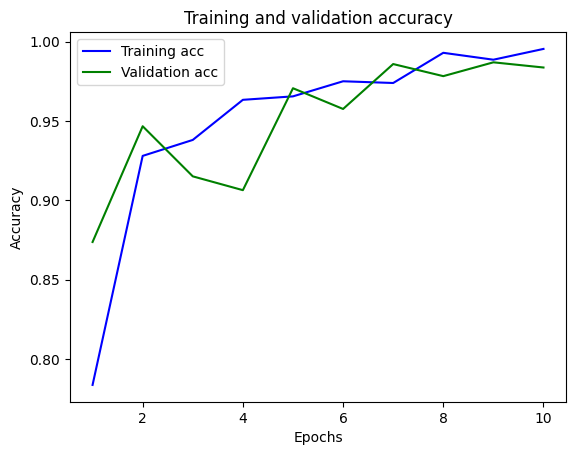

In [37]:
import matplotlib.pyplot as plt


# Get the accuracy and validation accuracy from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the number of epochs used for training
epochs = range(1, len(acc) + 1)

# Plot the training and validation accuracy
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [59]:
print(test_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [61]:
predicted_labels = (predictions > 0.5).astype(int)


In [63]:
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_labels)
print(f1)

0.8484848484848485


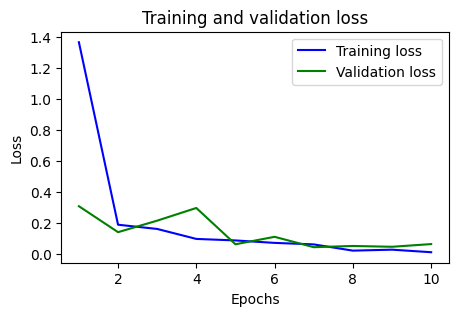

In [38]:
plt.figure(figsize=(5, 3))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [48]:
import tensorflow as tf
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.applications import InceptionV3
def build_incep_model(hp):
    model = Sequential()
    i_model = InceptionV3(weights='imagenet',
                    include_top = False,
                    input_shape = (150,150,3))
    for layer in i_model.layers:
        layer.trainable=False
    model.add(i_model)
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_units_1', min_value=128, max_value=1024, step=128, default=512), activation=hp.Choice('activation_1', values=['relu', 'tanh', 'sigmoid'])))
    model.add(Dense(units=hp.Int('dense_units_2', min_value=64, max_value=512, step=64, default=256), activation=hp.Choice('activation_2', values=['relu', 'tanh', 'sigmoid'])))
    model.add(Dense(units=hp.Int('dense_units_3', min_value=32, max_value=256, step=32, default=128), activation=hp.Choice('activation_3', values=['relu', 'tanh', 'sigmoid'])))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)
    
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [49]:
#initialize the tuner
tuner = RandomSearch(
        build_incep_model,
        objective='val_accuracy',
        max_trials=5,
        directory='tuner_directory',
        project_name='incep_tuner'
)

INFO:tensorflow:Reloading Tuner from tuner_directory\incep_tuner\tuner0.json


In [50]:
tuner.search(train_set, epochs=5, validation_data=test_set)

INFO:tensorflow:Oracle triggered exit


In [51]:
tuner.results_summary()

Results summary
Results in tuner_directory\incep_tuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
dense_units_1: 896
activation_1: relu
dense_units_2: 320
activation_2: sigmoid
dense_units_3: 128
activation_3: relu
optimizer: adam
learning_rate: 0.0001558411803393431
Score: 0.9815016388893127

Trial 3 summary
Hyperparameters:
dense_units_1: 384
activation_1: sigmoid
dense_units_2: 192
activation_2: relu
dense_units_3: 256
activation_3: sigmoid
optimizer: rmsprop
learning_rate: 0.00013779686611295206
Score: 0.9630032777786255

Trial 4 summary
Hyperparameters:
dense_units_1: 1024
activation_1: tanh
dense_units_2: 320
activation_2: sigmoid
dense_units_3: 256
activation_3: tanh
optimizer: sgd
learning_rate: 0.0011020449848025574
Score: 0.8226333260536194

Trial 2 summary
Hyperparameters:
dense_units_1: 1024
activation_1: relu
dense_units_2: 384
activation_2: tanh
dense_units_3: 64
activation_3: relu
optimizer: adam
learning_rate

In [52]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [54]:
best_model = build_incep_model(best_hps)

In [55]:
best_model.compile(optimizer=best_hps.get('optimizer'), loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
best_model.fit(train_set, validation_data=test_set, epochs=10)

Epoch 1/10
58/58 [==============================] - 320s 5s/step - loss: 0.4326 - accuracy: 0.8169 - val_loss: 0.3785 - val_accuracy: 0.8422
Epoch 2/10
58/58 [==============================] - 543s 9s/step - loss: 0.3101 - accuracy: 0.8886 - val_loss: 0.2891 - val_accuracy: 0.8988
Epoch 3/10
58/58 [==============================] - 225s 4s/step - loss: 0.2495 - accuracy: 0.9142 - val_loss: 0.2546 - val_accuracy: 0.9053
Epoch 4/10
58/58 [==============================] - 185s 3s/step - loss: 0.2238 - accuracy: 0.9253 - val_loss: 0.2952 - val_accuracy: 0.8792
Epoch 5/10
58/58 [==============================] - 246s 4s/step - loss: 0.2319 - accuracy: 0.9082 - val_loss: 0.2534 - val_accuracy: 0.9162
Epoch 6/10
58/58 [==============================] - 303s 5s/step - loss: 0.1997 - accuracy: 0.9302 - val_loss: 0.2004 - val_accuracy: 0.9271
Epoch 7/10
58/58 [==============================] - 287s 5s/step - loss: 0.1668 - accuracy: 0.9476 - val_loss: 0.1632 - val_accuracy: 0.9489
Epoch 8/10
58

In [64]:
predictions = best_model.predict(test_set)

15/15 [==============================] - 46s 2s/step


In [65]:
predicted_labels = (predictions > 0.5).astype(int)
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_labels)
print(f1)


0.9536585365853659


In [67]:
#initialize the tuner
from keras_tuner.tuners import BayesianOptimization
bo_tuner = BayesianOptimization(
        build_incep_model,
        objective='val_accuracy',
        max_trials=5,
        directory='tuner_directory',
        project_name='boy_incep_tuner'
)

INFO:tensorflow:Reloading Tuner from tuner_directory\boy_incep_tuner\tuner0.json


In [68]:
bo_tuner.search(train_set, epochs=5, validation_data=test_set)

INFO:tensorflow:Oracle triggered exit


In [69]:
bo_best_hps = bo_tuner.get_best_hyperparameters(num_trials=1)[0]

In [53]:
best_model = build_incep_model(best_hps)

In [15]:
bo_tuner.results_summary()

Results summary
Results in tuner_directory\boy_incep_tuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
dense_units_1: 768
activation_1: tanh
dense_units_2: 64
activation_2: relu
dense_units_3: 224
activation_3: sigmoid
optimizer: rmsprop
learning_rate: 0.00015359239632010879
Score: 0.9553862810134888

Trial 1 summary
Hyperparameters:
dense_units_1: 128
activation_1: sigmoid
dense_units_2: 256
activation_2: sigmoid
dense_units_3: 128
activation_3: tanh
optimizer: rmsprop
learning_rate: 0.0011034007829890296
Score: 0.9173014163970947

Trial 4 summary
Hyperparameters:
dense_units_1: 384
activation_1: sigmoid
dense_units_2: 448
activation_2: relu
dense_units_3: 32
activation_3: relu
optimizer: adam
learning_rate: 0.00234849423835777
Score: 0.8803046941757202

Trial 3 summary
Hyperparameters:
dense_units_1: 768
activation_1: sigmoid
dense_units_2: 512
activation_2: tanh
dense_units_3: 32
activation_3: sigmoid
optimizer: rmsprop
le

In [70]:
bo_best_hps = bo_tuner.get_best_hyperparameters(num_trials=1)[0]

In [71]:
bo_best_model = build_incep_model(bo_best_hps)

In [72]:
bo_best_model.compile(optimizer=bo_best_hps.get('optimizer'), loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
bo_best_model.fit(train_set, validation_data=test_set, epochs=10)

Epoch 1/10
58/58 [==============================] - 204s 3s/step - loss: 0.6296 - accuracy: 0.6525 - val_loss: 0.5015 - val_accuracy: 0.7693
Epoch 2/10
58/58 [==============================] - 158s 3s/step - loss: 0.4156 - accuracy: 0.8283 - val_loss: 0.5080 - val_accuracy: 0.7040
Epoch 3/10
58/58 [==============================] - 196s 3s/step - loss: 0.3524 - accuracy: 0.8582 - val_loss: 0.3706 - val_accuracy: 0.8509
Epoch 4/10
58/58 [==============================] - 240s 4s/step - loss: 0.3250 - accuracy: 0.8731 - val_loss: 0.5941 - val_accuracy: 0.7367
Epoch 5/10
58/58 [==============================] - 225s 4s/step - loss: 0.2995 - accuracy: 0.8851 - val_loss: 0.2529 - val_accuracy: 0.9075
Epoch 6/10
58/58 [==============================] - 235s 4s/step - loss: 0.2825 - accuracy: 0.8932 - val_loss: 0.2584 - val_accuracy: 0.8999
Epoch 7/10
58/58 [==============================] - 205s 4s/step - loss: 0.2681 - accuracy: 0.8932 - val_loss: 0.4389 - val_accuracy: 0.8248
Epoch 8/10
58

In [79]:
train_loss, train_acc = best_model.evaluate(train_set)
test_loss, test_acc   = best_model.evaluate(test_set)
test_loss, test_acc

 2/58 [>.............................] - ETA: 2:44 - loss: 0.1390 - accuracy: 0.9375

KeyboardInterrupt: 

In [80]:
train_loss, train_acc = bo_best_model.evaluate(train_set)
test_loss, test_acc   = bo_best_model.evaluate(test_set)
test_loss, test_acc

15/15 [==============================] - 42s 3s/step - loss: 0.3084 - accuracy: 0.8857


(0.30841854214668274, 0.8857453465461731)

In [81]:
predictions = bo_best_model.predict(test_set)
predicted_labels = (predictions > 0.5).astype(int)
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_labels)
print(f1)

15/15 [==============================] - 59s 3s/step
0.8844884488448844


In [36]:
from keras_tuner.tuners import Hyperband

tuner = Hyperband(
    build_incep_model,
    objective='val_accuracy',
    
    max_epochs=5,# Maximum number of epochs for each configuration
    factor=3,  # Reduction factor for the number of trials in each bracket
    directory='tuner_directory',
    project_name='hyperband_incep_tuner'
)

tuner.search(train_set, epochs=5, validation_data=test_set)

INFO:tensorflow:Reloading Tuner from tuner_directory\hyperband_incep_tuner\tuner0.json

Search: Running Trial #11

Value             |Best Value So Far |Hyperparameter
128               |640               |dense_units_1
tanh              |relu              |activation_1
384               |192               |dense_units_2
tanh              |relu              |activation_2
224               |256               |dense_units_3
sigmoid           |relu              |activation_3
rmsprop           |adam              |optimizer
0.00086725        |0.00049548        |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round



KeyboardInterrupt: 

In [37]:
hp_best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [38]:
hp_best_model = build_incep_model(hp_best_hps)

In [39]:
tuner.results_summary()

Results summary
Results in tuner_directory\hyperband_incep_tuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0004 summary
Hyperparameters:
dense_units_1: 640
activation_1: relu
dense_units_2: 192
activation_2: relu
dense_units_3: 256
activation_3: relu
optimizer: adam
learning_rate: 0.0004954758602423581
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.9423286318778992

Trial 0008 summary
Hyperparameters:
dense_units_1: 768
activation_1: tanh
dense_units_2: 512
activation_2: tanh
dense_units_3: 128
activation_3: relu
optimizer: adam
learning_rate: 0.00022696901745649704
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.9336234927177429

Trial 0005 summary
Hyperparameters:
dense_units_1: 512
activation_1: tanh
dense_units_2: 320
activation_2: tanh
dense_units_3: 192
activation_3: tanh
optimizer: sgd
learning_rate: 0.0022844660479124862
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tu

In [22]:
from keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
incep_model_H1 = Sequential()
model = InceptionV3(weights='imagenet',
                    include_top = False,
                    input_shape = (150,150,3))
for layer in model.layers:
    layer.trainable=False
incep_model_H1.add(model)
incep_model_H1.add(Flatten())
incep_model_H1.add(Dense(1024,activation='selu'))

incep_model_H1.add(Dense(512,activation='selu'))

incep_model_H1.add(Dense(128,activation='selu'))

incep_model_H1.add(Dense(1,activation='sigmoid'))
incep_model_H1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_10 (Dense)            (None, 1024)              18875392  
                                                                 
 dense_11 (Dense)            (None, 512)               524800    
                                                                 
 dense_12 (Dense)            (None, 128)               65664     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 41268769 (157.43 MB)
Trainable params: 1

In [23]:
optimizer = tf.keras.optimizers.Adagrad()
incep_model_H1.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
epochs = 10
history_1 = incep_model_H1.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)

Epoch 1/10
58/58 [==============================] - 247s 4s/step - loss: 0.7386 - accuracy: 0.8049 - val_loss: 0.2570 - val_accuracy: 0.9108
Epoch 2/10
58/58 [==============================] - 6830s 120s/step - loss: 0.2180 - accuracy: 0.9231 - val_loss: 0.1848 - val_accuracy: 0.9391
Epoch 3/10
58/58 [==============================] - 970s 17s/step - loss: 0.1554 - accuracy: 0.9454 - val_loss: 0.1983 - val_accuracy: 0.9184
Epoch 4/10
58/58 [==============================] - 829s 14s/step - loss: 0.1132 - accuracy: 0.9633 - val_loss: 0.1135 - val_accuracy: 0.9663
Epoch 5/10
58/58 [==============================] - 348s 6s/step - loss: 0.0981 - accuracy: 0.9688 - val_loss: 0.0955 - val_accuracy: 0.9674
Epoch 6/10
58/58 [==============================] - 322s 6s/step - loss: 0.0727 - accuracy: 0.9791 - val_loss: 0.0968 - val_accuracy: 0.9652
Epoch 7/10
58/58 [==============================] - 340s 6s/step - loss: 0.0572 - accuracy: 0.9880 - val_loss: 0.0772 - val_accuracy: 0.9771
Epoch 8/

In [27]:
train_loss, train_acc = incep_model_H1.evaluate(train_set)
test_loss, test_acc   = incep_model_H1.evaluate(test_set)
test_loss, test_acc

15/15 [==============================] - 74s 4s/step - loss: 0.0643 - accuracy: 0.9815


(0.06432704627513885, 0.9815016388893127)

In [28]:
from keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
incep_model_H2 = Sequential()
model = InceptionV3(weights='imagenet',
                    include_top = False,
                    input_shape = (150,150,3))
for layer in model.layers:
    layer.trainable=False
incep_model_H2.add(model)
incep_model_H2.add(Flatten())
incep_model_H2.add(Dense(1024,activation='selu'))

incep_model_H2.add(Dense(512,activation='selu'))

incep_model_H2.add(Dense(128,activation='selu'))

incep_model_H2.add(Dense(1,activation='sigmoid'))
incep_model_H2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 18432)             0         
                                                                 
 dense_14 (Dense)            (None, 1024)              18875392  
                                                                 
 dense_15 (Dense)            (None, 512)               524800    
                                                                 
 dense_16 (Dense)            (None, 128)               65664     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 41268769 (157.43 MB)
Trainable params: 1

In [30]:
optimizer = tf.keras.optimizers.Adam()
incep_model_H2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
epochs = 10
history_2 = incep_model_H2.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)

Epoch 1/10
58/58 [==============================] - 445s 6s/step - loss: 3.5925 - accuracy: 0.7794 - val_loss: 0.6083 - val_accuracy: 0.8629
Epoch 2/10
58/58 [==============================] - 320s 5s/step - loss: 0.6607 - accuracy: 0.8712 - val_loss: 0.3124 - val_accuracy: 0.9271
Epoch 3/10
58/58 [==============================] - 308s 5s/step - loss: 0.2235 - accuracy: 0.9353 - val_loss: 0.1091 - val_accuracy: 0.9684
Epoch 4/10
58/58 [==============================] - 259s 4s/step - loss: 0.1200 - accuracy: 0.9631 - val_loss: 0.1845 - val_accuracy: 0.9358
Epoch 5/10
58/58 [==============================] - 227s 4s/step - loss: 0.1357 - accuracy: 0.9563 - val_loss: 0.0575 - val_accuracy: 0.9761
Epoch 6/10
58/58 [==============================] - 224s 4s/step - loss: 0.0966 - accuracy: 0.9660 - val_loss: 0.1214 - val_accuracy: 0.9565
Epoch 7/10
58/58 [==============================] - 233s 4s/step - loss: 0.0394 - accuracy: 0.9889 - val_loss: 0.0475 - val_accuracy: 0.9869
Epoch 8/10
58

In [34]:
train_loss, train_acc = incep_model_H2.evaluate(train_set)
test_loss, test_acc   = incep_model_H2.evaluate(test_set)
test_loss, test_acc

15/15 [==============================] - 67690s 4834s/step - loss: 0.0558 - accuracy: 0.9815


(0.05577753484249115, 0.9815016388893127)

In [35]:
from keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
incep_model_H3 = Sequential()
model = InceptionV3(weights='imagenet',
                    include_top = False,
                    input_shape = (150,150,3))
for layer in model.layers:
    layer.trainable=False
incep_model_H3.add(model)
incep_model_H3.add(Flatten())
incep_model_H3.add(Dense(1024,activation='selu'))

incep_model_H3.add(Dense(512,activation='selu'))

incep_model_H3.add(Dense(128,activation='relu'))

incep_model_H3.add(Dense(1,activation='sigmoid'))
incep_model_H3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_5 (Flatten)         (None, 18432)             0         
                                                                 
 dense_18 (Dense)            (None, 1024)              18875392  
                                                                 
 dense_19 (Dense)            (None, 512)               524800    
                                                                 
 dense_20 (Dense)            (None, 128)               65664     
                                                                 
 dense_21 (Dense)            (None, 1)                 129       
                                                                 
Total params: 41268769 (157.43 MB)
Trainable params: 1

In [36]:
optimizer = tf.keras.optimizers.Adam()
incep_model_H3.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
epochs = 10
history_2 = incep_model_H3.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)

Epoch 1/10
58/58 [==============================] - 448s 7s/step - loss: 2.9575 - accuracy: 0.7617 - val_loss: 0.5494 - val_accuracy: 0.8270
Epoch 2/10
58/58 [==============================] - 370s 6s/step - loss: 0.1963 - accuracy: 0.9220 - val_loss: 0.1510 - val_accuracy: 0.9510
Epoch 3/10
58/58 [==============================] - 512s 9s/step - loss: 0.1489 - accuracy: 0.9413 - val_loss: 0.0909 - val_accuracy: 0.9663
Epoch 4/10
58/58 [==============================] - 338s 6s/step - loss: 0.1117 - accuracy: 0.9593 - val_loss: 0.6837 - val_accuracy: 0.7933
Epoch 5/10
58/58 [==============================] - 258s 4s/step - loss: 0.0837 - accuracy: 0.9701 - val_loss: 0.2588 - val_accuracy: 0.9162
Epoch 6/10
58/58 [==============================] - 293s 5s/step - loss: 0.0676 - accuracy: 0.9791 - val_loss: 0.0818 - val_accuracy: 0.9706
Epoch 7/10
58/58 [==============================] - 281s 5s/step - loss: 0.0221 - accuracy: 0.9938 - val_loss: 0.0321 - val_accuracy: 0.9880
Epoch 8/10
58

In [38]:
train_loss, train_acc = incep_model_H3.evaluate(train_set)
test_loss, test_acc   = incep_model_H3.evaluate(test_set)
test_loss, test_acc

15/15 [==============================] - 33s 2s/step - loss: 0.0443 - accuracy: 0.9880


(0.04426887631416321, 0.9880304932594299)

In [42]:
from keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
incep_model_H4 = Sequential()
model = InceptionV3(weights='imagenet',
                    include_top = False,
                    input_shape = (150,150,3))
for layer in model.layers:
    layer.trainable=False
incep_model_H4.add(model)
incep_model_H4.add(Flatten())
incep_model_H4.add(Dense(640,activation='relu'))

incep_model_H4.add(Dense(192,activation='relu'))

incep_model_H4.add(Dense(256,activation='relu'))

incep_model_H4.add(Dense(1,activation='sigmoid'))
incep_model_H4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_7 (Flatten)         (None, 18432)             0         
                                                                 
 dense_26 (Dense)            (None, 640)               11797120  
                                                                 
 dense_27 (Dense)            (None, 192)               123072    
                                                                 
 dense_28 (Dense)            (None, 256)               49408     
                                                                 
 dense_29 (Dense)            (None, 1)                 257       
                                                                 
Total params: 33772641 (128.83 MB)
Trainable params: 1

In [43]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00049548)
incep_model_H4.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
epochs = 10
history_3 = incep_model_H4.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)

Epoch 1/10
58/58 [==============================] - 285s 4s/step - loss: 0.7309 - accuracy: 0.7957 - val_loss: 0.2305 - val_accuracy: 0.9162
Epoch 2/10
58/58 [==============================] - 188s 3s/step - loss: 0.1813 - accuracy: 0.9340 - val_loss: 0.1559 - val_accuracy: 0.9467
Epoch 3/10
58/58 [==============================] - 186s 3s/step - loss: 0.1118 - accuracy: 0.9603 - val_loss: 0.0935 - val_accuracy: 0.9695
Epoch 4/10
58/58 [==============================] - 234s 4s/step - loss: 0.0882 - accuracy: 0.9655 - val_loss: 0.1496 - val_accuracy: 0.9423
Epoch 5/10
58/58 [==============================] - 229s 4s/step - loss: 0.0503 - accuracy: 0.9840 - val_loss: 0.1196 - val_accuracy: 0.9510
Epoch 6/10
58/58 [==============================] - 229s 4s/step - loss: 0.0239 - accuracy: 0.9946 - val_loss: 0.0495 - val_accuracy: 0.9837
Epoch 7/10
58/58 [==============================] - 231s 4s/step - loss: 0.0199 - accuracy: 0.9954 - val_loss: 0.0732 - val_accuracy: 0.9684
Epoch 8/10
58

In [45]:
train_loss, train_acc = incep_model_H4.evaluate(train_set)
test_loss, test_acc   = incep_model_H4.evaluate(test_set)
test_loss, test_acc

15/15 [==============================] - 46s 3s/step - loss: 0.0292 - accuracy: 0.9935


(0.029163777828216553, 0.9934711456298828)

In [74]:
predictions =incep_model_H4.predict(test_set)
predicted_labels = (predictions > 0.5).astype(int)
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_labels)
print(f1)

15/15 [==============================] - 81s 3s/step
0.992822966507177


In [75]:
predictions =incep_model_H3.predict(test_set)
predicted_labels = (predictions > 0.5).astype(int)
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_labels)
print(f1)

15/15 [==============================] - 45s 2s/step
0.9869203329369798


In [76]:
prediction =incep_model_H4.predict(test_set)
predicted_label = (prediction > 0.5).astype(int)
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_label)
print(f1)

15/15 [==============================] - 41s 3s/step
0.992822966507177


In [77]:
predictions =incep_model_H2.predict(test_set)
predicted_labels = (predictions > 0.5).astype(int)
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_labels)
print(f1)

15/15 [==============================] - 78s 3s/step
0.9798816568047338
